In [2]:
import matplotlib.pyplot as plt
import math

# plt.style.use('fivethirtyeight')

In [3]:
def mean (some_list):
    list_sum = 0
    for num in some_list:
        list_sum += num
    avg = list_sum/len(some_list)
    return avg

def median (some_list):
    list_sort = sorted(some_list) 
    mid_i = len(list_sort) // 2
    right_mid = len(list_sort) // 2 - 1
    if len(list_sort) % 2 == 1:
        med = list_sort[mid_i]
    else:
        med = (list_sort[mid_i] + list_sort[right_mid]) / 2
 
    return med
    
def variance (some_list):
    current_mean = mean(some_list)
    current_sum = 0
    for number in some_list:
        current_sum += (number - current_mean)**2

    var = current_sum/len(some_list)

    return var

def stdev (some_list):
    dev = (variance(some_list))**(1/2)
    return dev


def gauss(x, mean, stdev):
    gaussian = (1/(stdev*math.sqrt(2*math.pi)))*math.e**(-1/2*((x - mean)/(stdev))**2)


    # gaussian = (1/(stdev*math.sqrt(2*math.pi)))*math.e**(( x - mean)**2)/(2*stdev**2)

    return gaussian

In [4]:

with open("inaugural-address.txt") as f:
    opening = f.readlines()


inaug_db = []
speech = ""
for line in opening: 
    if line[0] == "$":
        if speech: 
            speech_list = speech.split()
            prez_dict['speech'] = speech_list
            inaug_db.append(prez_dict)
        header = line.split()
        name = []
        term = ""
        year = ""
        speech = ""
        for index in range(len(header)):
            token = header[index]
           
            if token == "$":
                continue
            elif token[0].isalpha():
                name.append(token)
            elif len(token) == 1:
                term = token
            elif len(token) == 4:
                year = token
            prez_name = " ".join(name)
            prez_dict = {'name': prez_name, 'term': term, 'year': year, 'speech': []}
    else:
        speech +=line

# for pres in inaug_db:
#     print(pres['name'], pres['term'], pres['year'])

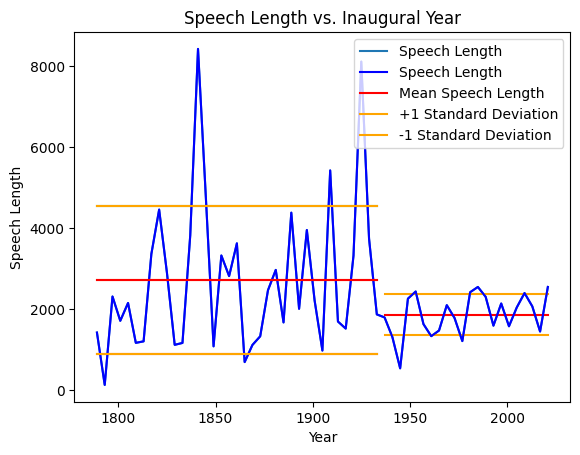

In [5]:
years = []
speech_lens = []

for pres in inaug_db: 
    years.append(int(pres['year']))
    speech_lens.append(len(pres['speech']))


index = years.index(1937)

pre_yrs = years[:index]
pre_lens = speech_lens[:index]
pre_mean = mean(pre_lens)
pre_med = median(pre_lens)
pre_var = variance(pre_lens)
pre_sd = stdev(pre_lens)

post_yrs = years[index:]
post_lens = speech_lens[index:]
post_mean = mean(post_lens)
post_med = median(post_lens)
post_var = variance(post_lens)
post_sd = stdev(post_lens)



plt.plot(years, speech_lens, label = 'Speech Length')



plt.title('Speech Length vs. Inaugural Year')
x_axis = plt.xlabel('Year')
y_axis = plt.ylabel('Speech Length')
pre_plot_mean = plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_mean,pre_mean,])
post_plot_mean = plt.plot([post_yrs[0],post_yrs[-1]],[post_mean,post_mean], color = 'red')
pre_plot_sd_pos = plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_mean+pre_sd,pre_mean+pre_sd])
pre_plot_sd_neg = plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_mean-pre_sd,pre_mean-pre_sd])
post_plot_sd_pos = plt.plot([post_yrs[0],post_yrs[-1]],[post_mean+post_sd,post_mean+post_sd], color = 'orange')
post_plot_sd_neg = plt.plot([post_yrs[0],post_yrs[-1]],[post_mean-post_sd,post_mean-post_sd], color = 'orange')




speech_len_plt = plt.plot(years, speech_lens, color = 'blue', label = 'Speech Length')


pre_mean_plt = plt.plot([pre_yrs[0], pre_yrs[-1]],[pre_mean, pre_mean], color = 'red', label='Mean Speech Length')

pre_plot_sd_pos = plt.plot([pre_yrs[0], pre_yrs[-1]], [pre_sd + pre_mean,pre_sd + pre_mean],color = 'orange', label = '+1 Standard Deviation')

pre_plot_sd_neg = plt.plot([pre_yrs[0], pre_yrs[-1]], [pre_mean - pre_sd,pre_mean - pre_sd],color = 'orange', label = '-1 Standard Deviation')


plt.legend()
plt.show()


7314
7314


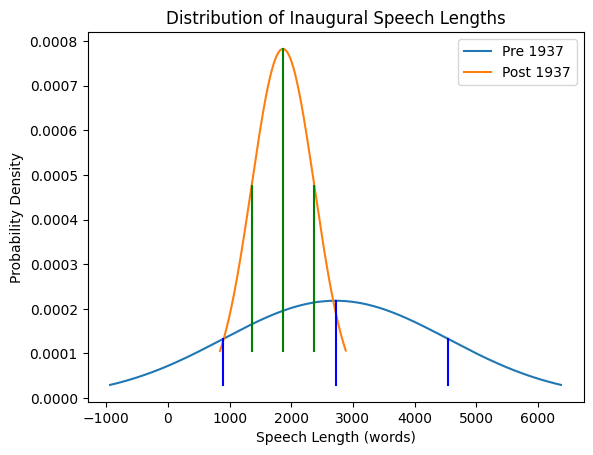

In [ ]:
# Gaussian Distribution



pre_start = int(-2*pre_sd+pre_mean)
pre_stop = int(2*pre_sd+pre_mean)


# pre 1 sd to the left and right
pre_one_sdpos = pre_sd + pre_mean
pre_one_sdneg = pre_mean - pre_sd



post_start = int(-2*post_sd+post_mean)
post_stop = int(2*post_sd+post_mean)


# pre 1 sd to the left and right
post_one_sdpos = post_sd + post_mean
post_one_sdneg = post_mean - post_sd


# fill a list with range of values
pre_dist = []
for x in range(pre_start, pre_stop):
    pre_dist.append(x)

# fill list with gaussian inputs
pre_gauss = []
for x in pre_dist:
    pre_gauss.append(gauss(x, pre_mean, pre_sd))


# fill a list with range of values
post_dist = []
for x in range(post_start, post_stop):
    post_dist.append(x)

# fill list with gaussian inputs
post_gauss = []
for x in post_dist:
    post_gauss.append(gauss(x, post_mean, post_sd))



plt.title('Distribution of Inaugural Speech Lengths')
plt.xlabel('Speech Length (words)')
plt.ylabel('Probability Density')


# print(len(pre_gauss))
# print(len(pre_dist))



# print(pre_dist)
plt.plot(pre_dist,pre_gauss,label = 'Pre 1937')
plt.plot(post_dist,post_gauss, label = 'Post 1937')


 
plt.plot([pre_mean, pre_mean],[min(pre_gauss),max(pre_gauss)],c='blue')
plt.plot([post_mean, post_mean],[min(post_gauss),max(post_gauss)],c='green')


plt.plot([pre_mean+pre_sd, pre_mean+pre_sd],[pre_gauss[0],gauss(pre_mean+pre_sd,pre_mean, pre_sd)],c='blue')
plt.plot([pre_mean-pre_sd, pre_mean-pre_sd],[pre_gauss[0],gauss(pre_mean-pre_sd,pre_mean, pre_sd)],c='blue')
plt.plot([post_mean-post_sd, post_mean-post_sd],[post_gauss[0],gauss(post_mean-post_sd,post_mean, post_sd)],c='green')
plt.plot([post_mean+post_sd, post_mean+post_sd],[post_gauss[0],gauss(post_mean+post_sd,post_mean, post_sd)],c='green')




plt.legend()

plt.show()


In [7]:
prez = inaug_db[0]['speech']

avg_word_list = []
avg_sentence_length = []
big_word_list = []
for prez in inaug_db:
    sentence_counter = 0
    words = []
    word_counter = 0
    big_word = []
    big_word_counter = 0
    for word in prez["speech"]:
        if word[-1]  in "!.?":
            sentence_counter += 1 
            word_counter += 1 
            words.append(word_counter)
            word_counter = 0
        else:
            word_counter += 1

        big_word_counter = 0
        letter_counter = 0
        for char in word:
            if char.isalpha():
                letter_counter += 1
        if letter_counter >= 8:
            big_word_counter +=1
            big_word.append(big_word_counter)
            big_word_counter = 0
    
    large_words = sum(big_word)
    percent = large_words / len(prez['speech'])
    big_word_list.append(percent)



    average_words =  sum(words) / sentence_counter
    avg_word_list.append(average_words)
    avg_sentence_length.append(sentence_counter)



pre_mean_big_words = mean(big_word_list[:index])
pre_sd_big_words = stdev(big_word_list[:index])
post_mean_big_words = mean(big_word_list[index:])
post_sd_big_words = stdev(big_word_list[index:])



In [8]:
# Sentence Per Speech Code
pre_avg = mean(avg_word_list[:index])
pre_sd_avg = stdev(avg_word_list[:index])
post_avg = mean(avg_word_list[index:])
post_sd_avg = stdev(avg_word_list[index:])


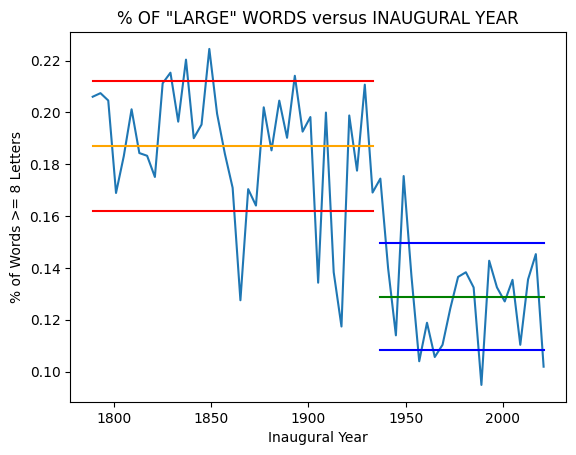

In [9]:
# Large Word % Code
plt.title('% OF "LARGE" WORDS versus INAUGURAL YEAR')
plt.xlabel('Inaugural Year')
plt.ylabel('% of Words >= 8 Letters')
plt.plot(years,big_word_list)

plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_mean_big_words,pre_mean_big_words], color = 'orange')
plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_mean_big_words+pre_sd_big_words,pre_mean_big_words+pre_sd_big_words], color = 'red')
plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_mean_big_words-pre_sd_big_words,pre_mean_big_words-pre_sd_big_words], color = 'red')
plt.plot([post_yrs[0],post_yrs[-1]],[post_mean_big_words,post_mean_big_words], color = 'green')
plt.plot([post_yrs[0],post_yrs[-1]],[post_mean_big_words-post_sd_big_words,post_mean_big_words-post_sd_big_words], color = 'blue')
plt.plot([post_yrs[0],post_yrs[-1]],[post_mean_big_words+post_sd_big_words,post_mean_big_words+post_sd_big_words], color = 'blue')


plt.show()

[1789, 1793, 1797, 1801, 1805, 1809, 1813, 1817, 1821, 1825, 1829, 1833, 1837, 1841, 1845, 1849, 1853, 1857, 1861, 1865, 1869, 1873, 1877, 1881, 1885, 1889, 1893, 1897, 1901, 1905, 1909, 1913, 1917, 1921, 1925, 1929, 1933, 1937, 1941, 1945, 1949, 1953, 1957, 1961, 1965, 1969, 1973, 1977, 1981, 1985, 1989, 1993, 1997, 2001, 2005, 2009, 2013, 2017, 2021]
[62.04347826086956, 33.75, 62.62162162162162, 41.8780487804878, 47.93333333333333, 55.857142857142854, 36.666666666666664, 27.3739837398374, 33.54135338345865, 38.25, 44.96, 39.03333333333333, 39.44329896907217, 38.64678899082569, 31.326797385620914, 49.40909090909091, 32.00961538461539, 31.685393258426966, 26.874074074074073, 26.846153846153847, 28.025, 31.046511627906977, 41.88135593220339, 26.783783783783782, 38.11363636363637, 27.929936305732483, 34.706896551724135, 30.43846153846154, 22.15, 29.78787878787879, 33.91875, 24.985294117647058, 25.847457627118644, 22.61904761904762, 20.74680306905371, 22.835365853658537, 22.05882352941176

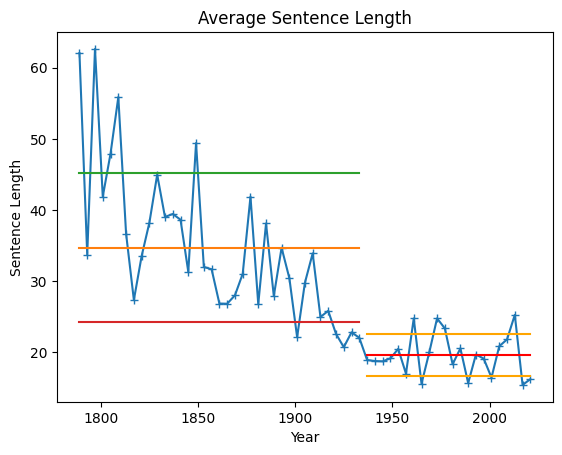

In [10]:
print(years)
print(avg_word_list)
plt.plot(years,avg_word_list,'+-')
plt.plot()
plt.title('Average Sentence Length')
plt.xlabel('Year')
plt.ylabel('Sentence Length')


pre_plot_mean = plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_avg,pre_avg,])
post_plot_mean = plt.plot([post_yrs[0],post_yrs[-1]],[post_avg,post_avg], color = 'red')
pre_plot_sd_pos = plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_avg+pre_sd_avg,pre_avg+pre_sd_avg])
pre_plot_sd_neg = plt.plot([pre_yrs[0],pre_yrs[-1]],[pre_avg-pre_sd_avg,pre_avg-pre_sd_avg])
post_plot_sd_pos = plt.plot([post_yrs[0],post_yrs[-1]],[post_avg+post_sd_avg,post_avg+post_sd_avg], color = 'orange')
post_plot_sd_neg = plt.plot([post_yrs[0],post_yrs[-1]],[post_avg-post_sd_avg,post_avg-post_sd_avg], color = 'orange')

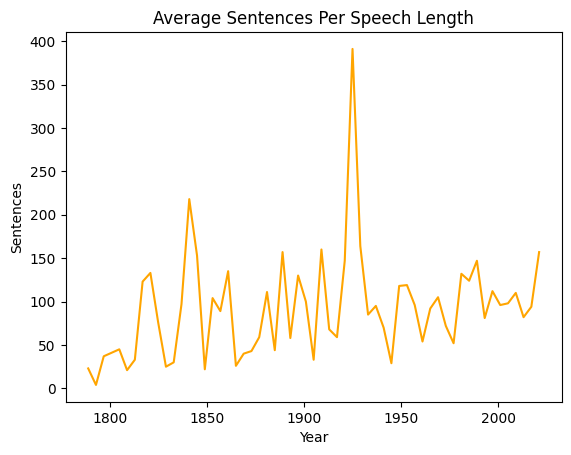

In [11]:
plt.title('Average Sentences Per Speech Length')
plt.xlabel('Year')
plt.ylabel('Sentences')
plt.plot(years,avg_sentence_length,c='orange')        


In [12]:
words = inaug_db[0]
sen_len = 0
VOWELS = 'aeiouy'
DIPTHONGS = ["ai", "au", "ei", "eu", "oi", "ou", "oy", "ia", "ie", "io", "iu", "ua", "ue", "uo", "uy", "ea", "ee"]
TRIPTHONGS = ["iau", "ieu", "iou", "uay", "uei", "uoi"]
PUNCS = ".!?,:'\':"



words = inaug_db[2]['speech'][725:735]
sylls = []
for word in words:
    vowels = 0

    for char in word:
        if char[-1] in PUNCS:
            word = word[:-2]
        if char in VOWELS:
             vowels += 1
    for chars in TRIPTHONGS:
        if chars in word:
            vowels -= 1

    for chars in DIPTHONGS:
        if chars in TRIPTHONGS:
            vowels -=1
        elif chars in word: 
            vowels -=1
    
    
    
    for char in word: 
        if char.isalpha() and char.lower() in VOWELS:
            vowels += 1 
    
    if word[-2:] == 'le' and word[-3] not in VOWELS or (word[-3:] == 'les' and word[-4] not in VOWELS):
        vowels +=1

    for combo in DIPTHONGS:
        if combo in word: 
            vowels += 1 
    print(combo)
    for combo in TRIPTHONGS:
        if combo in word: 
            vowels -= 1

    
    # if char in TRIPTHONGS:
    #     vowels -= 1
    # if char in DIPTHONGS:
    #     vowels -= 1
    sylls.append(vowels)





ee
ee
ee
ee
ee
ee
ee
ee
ee
ee


In [13]:
papers = {"HAMILTON": [], "JAY": [], "DISPUTED": [], "SHARED": [], "MADISON": []}

with open("federalist_papers.txt") as fed_papers:
    read = fed_papers.readlines()


authors = []
num = []



for line in read[:]:
    if line[0:10] == "FEDERALIST":
        paper_num = line.split()[-1]
        num.append(paper_num)

# print(num)
papers['Hamilton'].append(paper_num)










#     for name in papers:
#         if name in line:
#             authors.append(name)
# print(authors)

# for i in range(len(authors)):
#     if authors[i] in fed_papers:
#         fed_papers[authors[i]].append(paper_num)
#     else:
#         fed_papers[authors[i]] = [paper_num]

 

KeyError: 'Hamilton'

In [ ]:
# Mr. Rosenthal's Code



# plt.style.use('default')

# # Basic Plotting
# plt.plot(ages_x, py_dev_y)
# plt.plot(ages_x, js_dev_y)
# plt.plot(ages_x, dev_y)

# plt.title('Developer Salaries from 2019 StackOverflow Survey')
# plt.xlabel('Developer Age')
# plt.ylabel('Media Salary (USD)')

# plt.show